# Data Science Competition (DSC) LOGIKA UI 2025  
### **Klasifikasi Rumah Adat Nusantara**

---

## Anggota Tim: *wets belom dicoba*
- **Bryant Farrel Titanius**  
- **Evans Kizito**  
- **Franklin Daniel Situmorang**

---

## Pengantar
Seiring dengan semakin berkurangnya pengetahuan generasi muda tentang rumah adat, upaya pelestarian budaya menjadi semakin penting.  
Kompetisi **Klasifikasi Rumah Adat Nusantara** ini memberikan kesempatan bagi peserta untuk membangun model yang mampu **mengenali berbagai rumah adat dari seluruh Indonesia**.  

Dataset yang digunakan berisi **ribuan citra rumah adat dari berbagai daerah**, dengan variasi pencahayaan, sudut pandang, dan kualitas gambar.  
Melalui penerapan **teknik data science dan computer vision**, peserta dapat menggali wawasan baru tentang **pola visual arsitektur Nusantara** serta berkontribusi dalam **digitalisasi dan pelestarian warisan budaya bangsa**.

---

## Objektif
Kurangnya pengetahuan masyarakat, khususnya generasi muda, tentang rumah adat Nusantara dapat menyebabkan **hilangnya identitas budaya dan warisan arsitektur yang berharga**.  

Dalam kompetisi ini, peserta ditantang untuk membangun **model klasifikasi gambar** yang mampu:
- Mengidentifikasi setiap gambar rumah adat secara **akurat dan efisien**,  
- Menunjukkan **generalisasi tinggi** terhadap variasi kondisi gambar (pencahayaan, sudut, kualitas).

---

## Tujuan
Tujuan utama dari kompetisi ini adalah untuk:
- **Mengasah kemampuan peserta** dalam bidang *data science* dan *computer vision*,  
- **Berperan dalam pelestarian budaya Nusantara** melalui teknologi,  
- **Mendukung digitalisasi dan dokumentasi** keragaman arsitektur tradisional Indonesia,  
- **Menumbuhkan kesadaran budaya** melalui penerapan ilmu dan inovasi berbasis data.  

Selain peningkatan keterampilan teknis, kompetisi ini juga menekankan **pemanfaatan teknologi berbasis data untuk pelestarian warisan budaya** di era digital.

---

> *“Dengan teknologi, kita jaga warisan budaya untuk masa depan.”*  
> — Tim wets belom dicoba

# Implementasi Model **Extending Vision Transformer Advanced Generasi 2 (EVA-02)**

**Apa itu EVA-02?**

**EVA-02 (Extending Vision Transformer Advanced Generasi 2)** merupakan model *Vision Transformer (ViT)* generasi terbaru yang dikembangkan untuk meningkatkan performa model berbasis *transformer* pada tugas-tugas *computer vision*.

EVA-02 dibangun di atas fondasi arsitektur **ViT-Large** dan **MAE (Masked Autoencoder)**, yang kemudian **dilatih ulang (pre-trained)** pada **dataset skala besar (ImageNet-22K dan LAION)** dengan teknik *self-supervised learning*.  
Hasilnya adalah model dengan kemampuan **representasi visual yang sangat kuat**, efisien dalam generalisasi, dan unggul di berbagai tugas *image classification*, *object detection*, serta *semantic segmentation*.

---

**Arsitektur dan Inovasi Utama**

| Aspek | Penjelasan |
|--------|-------------|
| **Base Architecture** | Berbasis pada *Vision Transformer (ViT)* — arsitektur yang memproses gambar seperti urutan token (patch) dan memanfaatkan *self-attention mechanism*. |
| **Pre-training Objective** | Menggunakan pendekatan *Masked Autoencoding* seperti MAE, di mana sebagian patch gambar disembunyikan dan model belajar merekonstruksi bagian yang hilang — melatih pemahaman kontekstual yang dalam terhadap struktur gambar. |
| **Fine-tuning Strategy** | Setelah pre-training skala besar, model di-*fine-tune* secara terarah untuk tugas *classification* dengan *supervised learning*, menghasilkan akurasi yang luar biasa tinggi. |
| **Parameter Scale** | Versi EVA-02 memiliki ukuran model mulai dari ratusan juta hingga miliaran parameter, memungkinkan pembelajaran pola visual yang sangat kompleks. |
| **Transfer Learning Ready** | Model ini dioptimalkan untuk digunakan kembali pada dataset baru dengan sedikit penyesuaian (*few-shot fine-tuning*), sangat efisien untuk kompetisi seperti klasifikasi rumah adat. |

---

**Keunggulan EVA-02 Dibandingkan Model Vision Transformer Sebelumnya**

| Fitur | EVA-02 | ViT Biasa |
|--------|---------|-----------|
| **Pre-training Objective** | MAE + Self-Distillation | Supervised only |
| **Dataset Latih** | ImageNet-22K + LAION (skala ratusan juta gambar) | ImageNet-1K |
| **Kinerja (Top-1 Acc @ ImageNet)** | >89% | ~81–83% |
| **Efisiensi Komputasi** | Lebih cepat dan stabil berkat *layer normalization* yang dioptimalkan | Lebih berat dan sulit konvergen |
| **Kemampuan Generalisasi** | Sangat tinggi di berbagai domain visual | Terbatas pada domain serupa dataset latih |
| **Kompatibilitas Transfer Learning** | Sangat baik (plug-and-play dengan timm) | Umumnya perlu tuning ulang besar-besaran |


In [ ]:
# IMPORT LIBRARY YANG DIPERLUKAN

import os, random, numpy as np, pandas as pd
from PIL import Image
from glob import glob
from tqdm.notebook import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, classification_report, confusion_matrix

import timm
import albumentations as A
from albumentations.pytorch import ToTensorV2

In [ ]:
# MOUNT GOOGLE DRIVE

from google.colab import drive
drive.mount('/content/drive')

# Eksplorasi dan Visualisasi Data

In [ ]:
# 1. Impor library yang dibutuhkan
import os
from google.colab import files

# 2. Upload file kaggle.json
# Jalankan sel ini, lalu pilih file kaggle.json yang sudah Anda unduh
print("Silakan upload file kaggle.json Anda:")
uploaded = files.upload()

# Pastikan file berhasil di-upload
for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

!mv 'kaggle (1).json' kaggle.json

# 3. Pindahkan file dan atur izin akses
# Membuat direktori .kaggle dan memindahkan file json ke sana
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Memberikan izin akses file agar bisa dibaca oleh Kaggle API
!chmod 600 ~/.kaggle/kaggle.json

print("\n✅ File kaggle.json sudah siap digunakan.")

# 4. Download dataset kompetisi
# GANTI '[nama-kompetisi-kaggle]' dengan API command dari halaman kompetisi Anda
print("\nMengunduh dataset...")
!kaggle competitions download -c dsc-logika-ui-2025

# 5. Unzip dataset
# Nama file zip biasanya sama dengan nama kompetisi
# GANTI '[nama-kompetisi-kaggle].zip' sesuai dengan nama file yang terunduh
print("\nMengekstrak file zip...")
!unzip -q dsc-logika-ui-2025.zip -d ./data/

print("\n🎉 Selesai! Dataset sudah di-download dan di-unzip ke dalam folder 'data'.")

Silakan upload file kaggle.json Anda:


Saving kaggle (1).json to kaggle (1).json
User uploaded file "kaggle (1).json" with length 65 bytes

✅ File kaggle.json sudah siap digunakan.

Mengunduh dataset...
 98% 3.88G/3.95G [01:04<00:01, 45.8MB/s]
100% 3.95G/3.95G [01:04<00:00, 66.1MB/s]

Mengekstrak file zip...

🎉 Selesai! Dataset sudah di-download dan di-unzip ke dalam folder 'data'.


[Path] ROOT=data
[Path] TRAIN=data/Train/Train
[Path] TEST =data/Test/Test
[Path] SAMPLE_SUB=data/sample_submission.csv
Found train images: 1752 in 5 classes: ['balinese', 'batak', 'dayak', 'javanese', 'minangkabau']
Found test images: 444 / 444

Class counts:


count
label             
balinese       776
batak           95
dayak           69
javanese       249
minangkabau    563

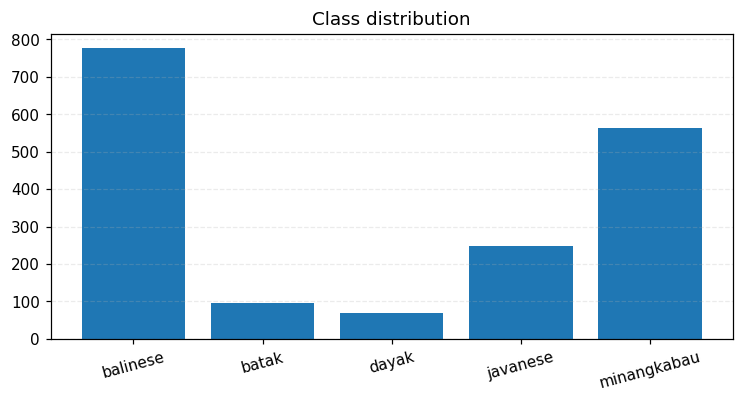


Scanning metadata & corruption...


100%|██████████| 1752/1752 [06:26<00:00,  4.53it/s]


No corrupted images detected in TRAIN.


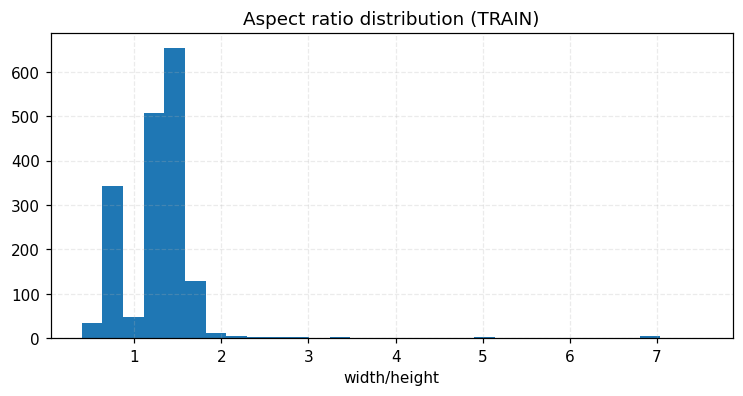

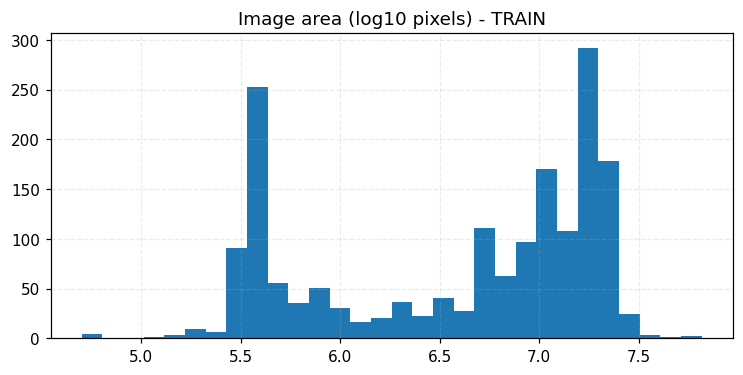


Extension distribution (TRAIN):


count
ext       
jpg   1750
png      2

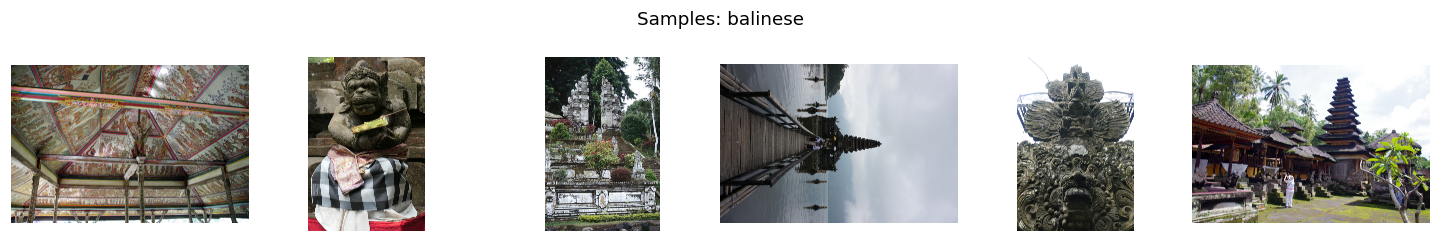

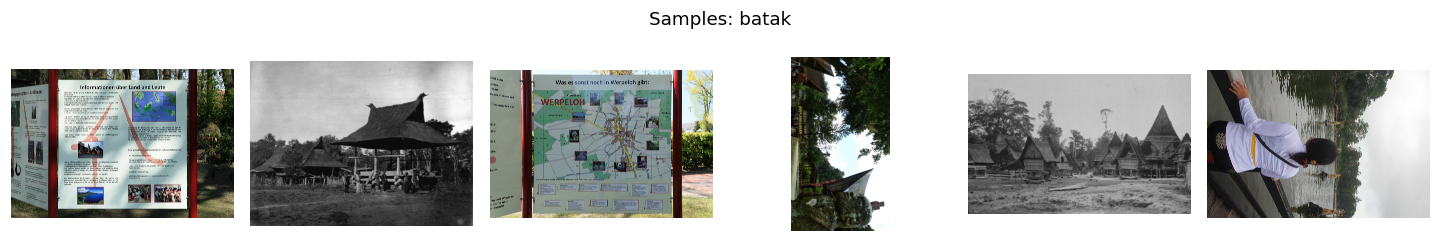

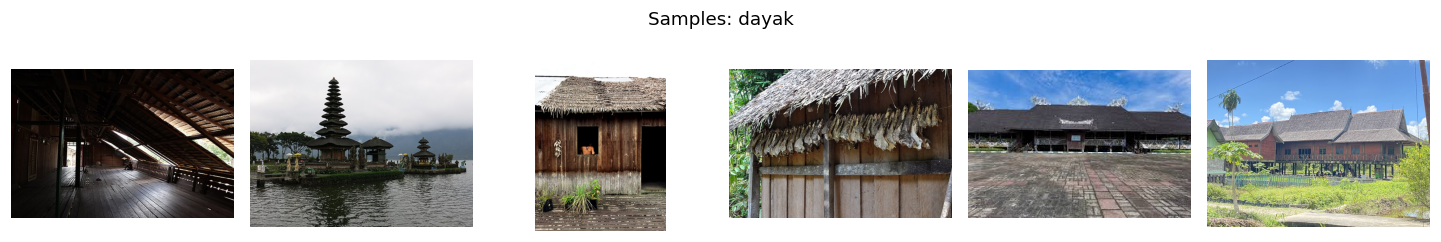

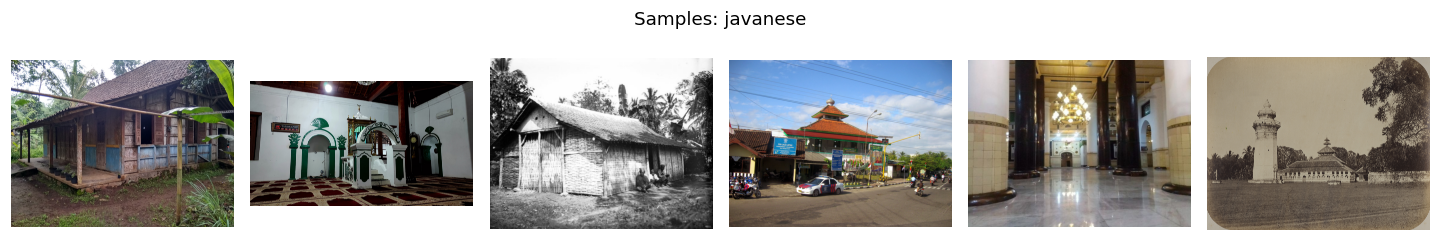

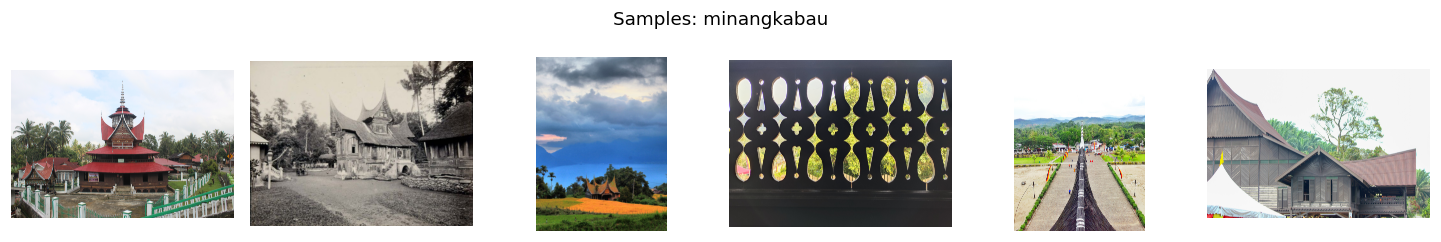


Computing dHash for TRAIN (for duplicates)...


100%|██████████| 1752/1752 [05:23<00:00,  5.42it/s]


Hashed: 1752
Exact duplicate groups (train subset): 58


dhash                                         image_path
0                    0  [data/Train/Train/balinese/balinese_train_0004...
15   45359451035542017  [data/Train/Train/javanese/javanese_train_0001...
29  115142164154289676  [data/Train/Train/balinese/balinese_train_0007...
63  255463455191780482  [data/Train/Train/balinese/balinese_train_0007...
80  432630419780677595  [data/Train/Train/javanese/javanese_train_0000...


Searching near-duplicates (train subset)...
Near-duplicate pairs (<= 5 bits): 65


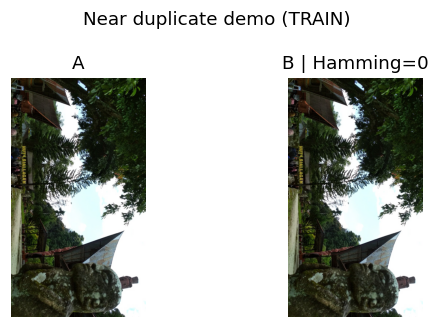

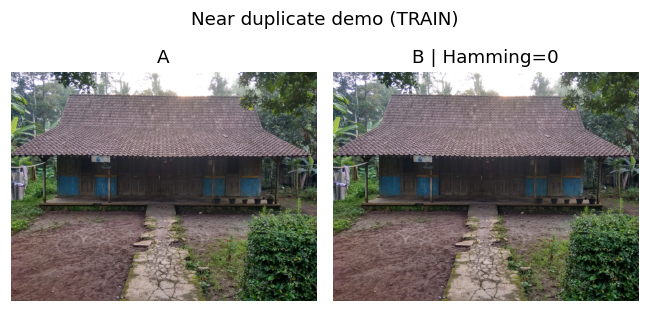

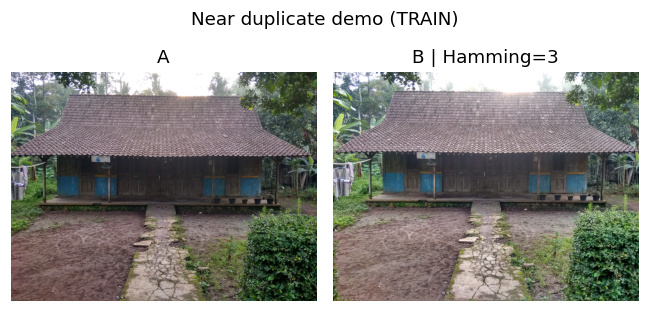

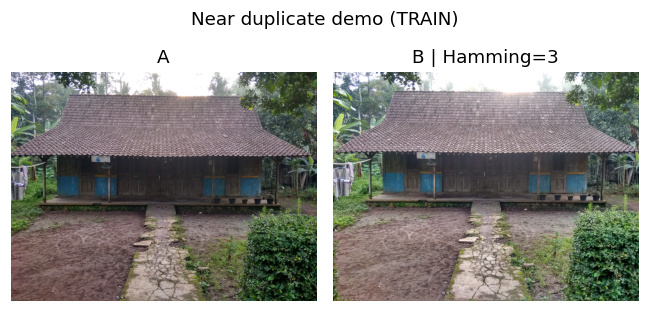


Checking train/test overlap via dHash...


100%|██████████| 444/444 [01:32<00:00,  4.80it/s]

Exact Train/Test duplicates (by dHash): 33


image_path_tr                dhash  \
0  data/Train/Train/balinese/balinese_train_00048...                    0   
1  data/Train/Train/balinese/balinese_train_00034...                    0   
2  data/Train/Train/balinese/balinese_train_00077...  9425991462919517591   
3  data/Train/Train/balinese/balinese_train_00072...                    0   
4  data/Train/Train/balinese/balinese_train_00056...   253102295203921670   

                 image_path_te  
0  data/Test/Test/Test_171.jpg  
1  data/Test/Test/Test_171.jpg  
2  data/Test/Test/Test_081.jpg  
3  data/Test/Test/Test_171.jpg  
4  data/Test/Test/Test_178.jpg

Searching near Train/Test duplicates...
Near Train/Test duplicates (<= 5): 36


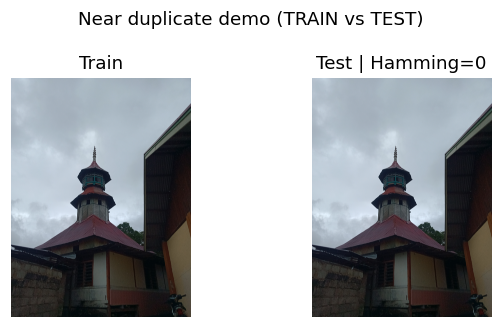

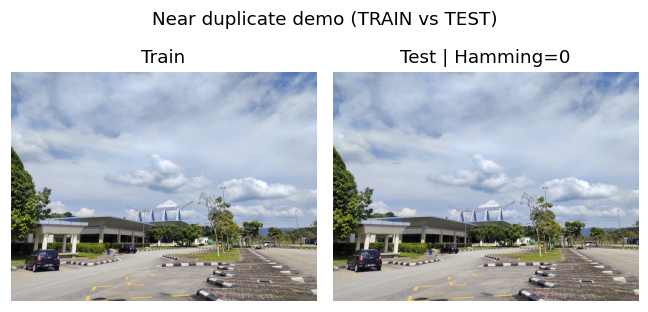

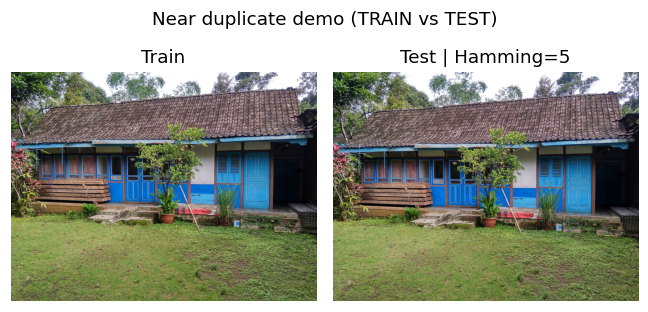

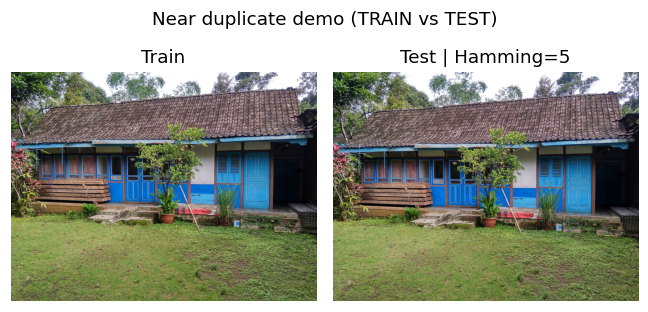

KeyError: 'label'

In [ ]:
# =========================================================
# EDA Rumah Adat (Colab-ready)
# - Scan struktur data (pakai data_clean kalau ada)
# - Distribusi kelas, ukuran gambar, rasio aspek, ekstensi
# - Cek gambar korup
# - Contoh grid per kelas
# - Train/Test overlap & (near) duplicate via dHash
# =========================================================
!pip -q install albumentations==1.4.7

import os, sys, math, random, io, cv2, warnings, gc
from glob import glob
from collections import Counter, defaultdict

import numpy as np
import pandas as pd
from PIL import Image, UnidentifiedImageError
import matplotlib.pyplot as plt
from tqdm import tqdm

import albumentations as A

warnings.filterwarnings("ignore")
plt.rcParams["figure.dpi"] = 110

# ----------------------------
# Config
# ----------------------------
class CFG:
    # pakai hasil cleaning kalau ada
    CANDIDATE_ROOTS = ["data_clean", "data", "/kaggle/input/dsc-logika-ui-2025"]
    TRAIN_SUBDIRS = ["Train", "Train"]
    TEST_SUBDIRS  = ["Test", "Test"]
    SAMPLE_SUB    = "sample_submission.csv"

    GRID_SAMPLES_PER_CLASS = 6
    MAX_DUP_SCAN = 5000        # cukup besar untuk dataset ini
    NEAR_DUP_HAMMING = 5       # threshold (0..64) dHash
    SEED = 42

random.seed(CFG.SEED)
np.random.seed(CFG.SEED)

def join_dir(root, parts):
    p = root
    for s in parts: p = os.path.join(p, s)
    return p

# ----------------------------
# Resolve paths
# ----------------------------
root = None
for cand in CFG.CANDIDATE_ROOTS:
    tr = join_dir(cand, CFG.TRAIN_SUBDIRS)
    te = join_dir(cand, CFG.TEST_SUBDIRS)
    if os.path.isdir(tr) and os.path.isdir(te):
        root = cand
        break

if root is None:
    raise RuntimeError("Gak nemu folder dataset. Pastikan ada salah satu: data_clean/, data/, atau /kaggle/input/dsc-logika-ui-2025/")

train_root = join_dir(root, CFG.TRAIN_SUBDIRS)
test_root  = join_dir(root, CFG.TEST_SUBDIRS)

sample_csv = os.path.join(root, CFG.SAMPLE_SUB)
if not os.path.isfile(sample_csv):
    # fallback umum: sample_submission.csv sering ada di 'data'
    alt = os.path.join("data", CFG.SAMPLE_SUB)
    sample_csv = alt if os.path.isfile(alt) else None

print(f"[Path] ROOT={root}")
print(f"[Path] TRAIN={train_root}")
print(f"[Path] TEST ={test_root}")
print(f"[Path] SAMPLE_SUB={sample_csv}")

# ----------------------------
# Scan train/test
# ----------------------------
def scan_train(train_dir):
    rows = []
    classes = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])
    for cls in classes:
        cdir = os.path.join(train_dir, cls)
        for f in os.listdir(cdir):
            if f.lower().endswith((".jpg",".jpeg",".png",".bmp",".webp",".tif",".tiff",".gif")):
                rows.append({"image_path": os.path.join(cdir, f), "label": cls})
    return pd.DataFrame(rows), classes

def scan_test(test_dir, sample_csv_path=None):
    # Kalau ada sample_submission, gunakan ID-nya untuk memastikan coverage
    if sample_csv_path is not None and os.path.isfile(sample_csv_path):
        sub = pd.read_csv(sample_csv_path)
        rows = []
        for _, r in sub.iterrows():
            iid = str(r["id"])
            # cari file dengan id.* secara rekursif
            hits = []
            for ext in ("jpg","jpeg","png","bmp","webp","tif","tiff","gif"):
                hits.extend(glob(os.path.join(test_dir, "**", f"{iid}.{ext}"), recursive=True))
            rows.append({"id": iid, "image_path": hits[0] if hits else None})
        return pd.DataFrame(rows)
    else:
        # fallback: list semua images
        files = []
        for p in glob(os.path.join(test_dir, "**", "*"), recursive=True):
            if os.path.isfile(p) and p.lower().endswith((".jpg",".jpeg",".png",".bmp",".webp",".tif",".tiff",".gif")):
                files.append({"id": os.path.splitext(os.path.basename(p))[0], "image_path": p})
        return pd.DataFrame(files)

train_df, classes = scan_train(train_root)
test_df = scan_test(test_root, sample_csv)

if train_df.empty:
    raise RuntimeError("Train kosong. Cek struktur folder Train/Train/<class_name>.")
print(f"Found train images: {len(train_df)} in {len(classes)} classes: {classes}")

if not test_df.empty:
    miss = test_df["image_path"].isna().sum()
    print(f"Found test images: {len(test_df) - miss} / {len(test_df)}")

# ----------------------------
# Quick summary per class
# ----------------------------
cnt = train_df["label"].value_counts().reindex(classes).fillna(0).astype(int)
print("\nClass counts:")
display(cnt.to_frame("count"))

plt.figure(figsize=(8,3.6))
plt.bar(cnt.index, cnt.values)
plt.title("Class distribution")
plt.xticks(rotation=15)
plt.grid(axis="y", ls="--", alpha=0.25)
plt.show()

# ----------------------------
# Image metadata & corruption check
# ----------------------------
def get_img_meta(path):
    try:
        with Image.open(path) as im:
            im = im.convert("RGB")
            w, h = im.size
            arr = np.array(im)
        # file size
        fs = os.path.getsize(path) if os.path.exists(path) else -1
        return {"ok": True, "width": w, "height": h, "area": w*h, "filesize": fs}
    except (UnidentifiedImageError, OSError, ValueError) as e:
        return {"ok": False, "width": None, "height": None, "area": None, "filesize": None}

meta = []
print("\nScanning metadata & corruption...")
for i, row in tqdm(train_df.iterrows(), total=len(train_df)):
    info = get_img_meta(row["image_path"])
    info.update({"image_path": row["image_path"], "label": row["label"]})
    meta.append(info)
meta_df = pd.DataFrame(meta)

bad = meta_df[~meta_df["ok"]]
if len(bad):
    print(f"[WARN] Corrupted images in TRAIN: {len(bad)}")
    display(bad.head())
else:
    print("No corrupted images detected in TRAIN.")

good = meta_df[meta_df["ok"]].copy()
good["aspect_ratio"] = good["width"] / good["height"]

plt.figure(figsize=(8,3.6))
plt.hist(good["aspect_ratio"].values, bins=30)
plt.title("Aspect ratio distribution (TRAIN)")
plt.xlabel("width/height")
plt.grid(ls="--", alpha=0.25)
plt.show()

plt.figure(figsize=(8,3.6))
plt.hist(np.log10(good["area"].values + 1), bins=30)
plt.title("Image area (log10 pixels) - TRAIN")
plt.grid(ls="--", alpha=0.25)
plt.show()

# ----------------------------
# Extension distribution
# ----------------------------
train_df["ext"] = train_df["image_path"].str.lower().str.split(".").str[-1]
ext_cnt = train_df["ext"].value_counts()
print("\nExtension distribution (TRAIN):")
display(ext_cnt.to_frame("count"))

# ----------------------------
# Sample grid per class
# ----------------------------
def imread_rgb(path):
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    if img is None:
        return np.zeros((128,128,3), np.uint8)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def show_grid(df, title, k=12, cols=6, size=2.4):
    df = df.sample(n=min(k, len(df)), random_state=CFG.SEED)
    imgs = [imread_rgb(p) for p in df["image_path"].tolist()]
    n = len(imgs)
    rows = math.ceil(n/cols)
    plt.figure(figsize=(cols*size, rows*size))
    for i, img in enumerate(imgs, 1):
        plt.subplot(rows, cols, i)
        plt.imshow(img)
        plt.axis("off")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

for cls in classes:
    sub = train_df[train_df["label"]==cls]
    if len(sub) == 0:
        continue
    show_grid(sub, f"Samples: {cls}", k=CFG.GRID_SAMPLES_PER_CLASS, cols=6, size=2.2)

# ----------------------------
# dHash for duplicates / near-duplicates
# ----------------------------
def dhash_pil(im, hash_size=8):
    # grayscale, resize (hash_size+1, hash_size)
    im = im.convert("L").resize((hash_size+1, hash_size), Image.Resampling.BICUBIC)
    im = np.asarray(im)
    diff = im[:, 1:] > im[:, :-1]
    # pack bits to 64-bit integer
    return sum(1 << i for (i, v) in enumerate(diff.flatten()) if v)

def compute_dhash(path):
    try:
        with Image.open(path) as im:
            return dhash_pil(im, hash_size=8)
    except Exception:
        return None

print("\nComputing dHash for TRAIN (for duplicates)...")
sub_paths = train_df["image_path"].tolist()
if len(sub_paths) > CFG.MAX_DUP_SCAN:
    sub_paths = random.sample(sub_paths, CFG.MAX_DUP_SCAN)

dhash_list = []
for p in tqdm(sub_paths):
    h = compute_dhash(p)
    dhash_list.append((p, h))

dfh = pd.DataFrame(dhash_list, columns=["image_path","dhash"]).dropna()
print(f"Hashed: {len(dfh)}")

# exact duplicates (same hash)
dup_groups = dfh.groupby("dhash")["image_path"].apply(list).reset_index()
exact_dups = dup_groups[dup_groups["image_path"].apply(len) > 1]
print(f"Exact duplicate groups (train subset): {len(exact_dups)}")
if len(exact_dups):
    display(exact_dups.head(5))

# near-duplicates: bucket by first N bits to reduce O(n^2)
def hamming(a, b):
    x = a ^ b
    return x.bit_count()  # Python 3.8+: int.bit_count()

print("\nSearching near-duplicates (train subset)...")
PREFIX_BITS = 16
buckets = defaultdict(list)
for p, h in zip(dfh["image_path"], dfh["dhash"]):
    buckets[h >> (64-PREFIX_BITS)].append((p, h))

near_pairs = []
for key, items in buckets.items():
    if len(items) < 2:
        continue
    # pairwise within bucket
    for i in range(len(items)):
        for j in range(i+1, len(items)):
            (p1,h1),(p2,h2) = items[i], items[j]
            d = hamming(h1,h2)
            if d <= CFG.NEAR_DUP_HAMMING:
                near_pairs.append((p1,p2,d))
print(f"Near-duplicate pairs (<= {CFG.NEAR_DUP_HAMMING} bits): {len(near_pairs)}")

if len(near_pairs):
    demo = near_pairs[:4]
    for p1,p2,d in demo:
        im1, im2 = imread_rgb(p1), imread_rgb(p2)
        fig, ax = plt.subplots(1,2, figsize=(6,3))
        ax[0].imshow(im1); ax[0].set_title("A"); ax[0].axis("off")
        ax[1].imshow(im2); ax[1].set_title(f"B | Hamming={d}"); ax[1].axis("off")
        plt.suptitle("Near duplicate demo (TRAIN)")
        plt.tight_layout(); plt.show()

# ----------------------------
# Train/Test overlap (data leakage check) via dHash
# ----------------------------
if not test_df.empty and test_df["image_path"].notna().any():
    print("\nChecking train/test overlap via dHash...")
    # hash all test (or sample if too large)
    test_paths = test_df["image_path"].dropna().tolist()
    if len(test_paths) > CFG.MAX_DUP_SCAN:
        test_paths = random.sample(test_paths, CFG.MAX_DUP_SCAN)
    thash = []
    for p in tqdm(test_paths):
        h = compute_dhash(p)
        thash.append((p,h))
    dft = pd.DataFrame(thash, columns=["image_path","dhash"]).dropna()

    # join exact
    inter = pd.merge(dfh, dft, on="dhash", suffixes=("_tr","_te"))
    print(f"Exact Train/Test duplicates (by dHash): {len(inter)}")
    if len(inter):
        display(inter.head())

    # near duplicates train-test (bucketed)
    print("Searching near Train/Test duplicates...")
    buckets_tr = defaultdict(list)
    for p,h in zip(dfh["image_path"], dfh["dhash"]):
        buckets_tr[h >> (64-PREFIX_BITS)].append((p,h))

    near_tt = []
    for p,h in zip(dft["image_path"], dft["dhash"]):
        key = h >> (64-PREFIX_BITS)
        for (ptr, htr) in buckets_tr.get(key, []):
            d = hamming(h, htr)
            if d <= CFG.NEAR_DUP_HAMMING:
                near_tt.append((ptr, p, d))
    print(f"Near Train/Test duplicates (<= {CFG.NEAR_DUP_HAMMING}): {len(near_tt)}")
    if len(near_tt):
        demo = near_tt[:4]
        for ptr, pte, d in demo:
            im1, im2 = imread_rgb(ptr), imread_rgb(pte)
            fig, ax = plt.subplots(1,2, figsize=(6,3))
            ax[0].imshow(im1); ax[0].set_title("Train"); ax[0].axis("off")
            ax[1].imshow(im2); ax[1].set_title(f"Test | Hamming={d}"); ax[1].axis("off")
            plt.suptitle("Near duplicate demo (TRAIN vs TEST)")
            plt.tight_layout(); plt.show()


#Pre Processing

Setelah melalui beberapa analisa pada data train dan duplikasinya yang bisa menjadi noise pada training kita selanjutnya, kita memilih untuk drop data duplicate near duplicate untuk memuluskan jalannya training

In [ ]:
!pip -q install imagehash pillow tqdm

import os, shutil, csv
from glob import glob
from PIL import Image
import imagehash
from tqdm import tqdm
from collections import defaultdict

# =========================
# Config
# =========================
DATA_ROOT = "data"  # root saat ini
TRAIN_SUBDIR = os.path.join(DATA_ROOT, "Train", "Train")
TEST_SUBDIR  = os.path.join(DATA_ROOT, "Test", "Test")

OUT_ROOT   = "data_clean"
OUT_TRAIN  = os.path.join(OUT_ROOT, "Train", "Train")
OUT_TEST   = os.path.join(OUT_ROOT, "Test", "Test")

HASH_SIZE      = 16          # pHash 16 -> 256-bit (cukup robust)
HAMMING_THR    = 8           # <=8 dianggap near-duplicate
RESOLVE_MODE   = "drop_conflicts"  # "drop_conflicts" | "majority_relabel"
MAJORITY_RATIO = 0.67        # bila "majority_relabel", minimal proporsi mayoritas

os.makedirs(OUT_TRAIN, exist_ok=True)
os.makedirs(OUT_TEST, exist_ok=True)

# =========================
# Load train list
# =========================
classes = sorted([d for d in os.listdir(TRAIN_SUBDIR)
                  if os.path.isdir(os.path.join(TRAIN_SUBDIR, d))])
rows = []
for c in classes:
    for p in glob(os.path.join(TRAIN_SUBDIR, c, "*")):
        if p.lower().endswith((".jpg",".jpeg",".png",".bmp",".webp")):
            rows.append((p, c))
print(f"Found train images: {len(rows)} in {len(classes)} classes: {classes}")

# =========================
# pHash all images
# =========================
def calc_phash(path, hash_size=HASH_SIZE):
    try:
        img = Image.open(path).convert("RGB")
        return imagehash.phash(img, hash_size=hash_size)
    except Exception as e:
        return None

hashes = []
sizes  = []
print("Hashing images...")
for p, c in tqdm(rows):
    h = calc_phash(p)
    if h is None:
        continue
    hashes.append(h)
    try:
        with Image.open(p) as im:
            sizes.append(im.size[0]*im.size[1])  # area untuk pilih representatif
    except:
        sizes.append(0)
N = len(hashes)
print("Hashed:", N)

# =========================
# Build clusters by pHash (Union-Find)
# =========================
parent = list(range(N))
def find(x):
    while parent[x] != x:
        parent[x] = parent[parent[x]]
        x = parent[x]
    return x

def union(a,b):
    ra, rb = find(a), find(b)
    if ra != rb:
        parent[rb] = ra

# pairwise (N ~ 1.7k cukup, O(N^2) aman)
print("Clustering by Hamming distance...")
for i in tqdm(range(N)):
    hi = hashes[i]
    for j in range(i+1, N):
        if (hashes[i] - hashes[j]) <= HAMMING_THR:
            union(i, j)

clusters = defaultdict(list)
for i in range(N):
    clusters[find(i)].append(i)

print("Total clusters:", len(clusters))
# statistik cluster
lens = [len(v) for v in clusters.values()]
print("Cluster size stats: min", min(lens), "max", max(lens), "mean", sum(lens)/len(lens))

# =========================
# Resolve duplicates & conflicts
# =========================
# Build rows2 with consistent indexing
rows2 = rows[:N]  # (path, class)
# Decisions: keep/remove/relabel
decisions = {}  # idx -> {"action": "keep|remove|relabel", "new_class":..., "reason":..., "cluster_id":..., "size":...}

cluster_id_counter = 0
removed_conflicts = 0
removed_dupes     = 0
relabel_count     = 0
kept_count        = 0

for cid, idxs in clusters.items():
    cluster_id_counter += 1
    labs = [rows2[i][1] for i in idxs]
    uniq = sorted(set(labs))
    # if conflict (more than one label present)
    if len(uniq) > 1:
        if RESOLVE_MODE == "drop_conflicts":
            for i in idxs:
                decisions[i] = {"action":"remove","reason":"cross_class_conflict","cluster_id":cluster_id_counter}
                removed_conflicts += 1
        else:
            # majority relabel
            from collections import Counter
            cnt = Counter(labs)
            maj_label, maj_n = cnt.most_common(1)[0]
            if maj_n/len(idxs) >= MAJORITY_RATIO:
                # keep one best (largest area) as representative, relabel yang lain ke maj_label
                best_i = max(idxs, key=lambda k: sizes[k])
                for i in idxs:
                    if i == best_i:
                        decisions[i] = {"action":"keep","reason":"majority_cluster_rep","cluster_id":cluster_id_counter,"new_class":maj_label}
                        kept_count += 1
                    else:
                        if rows2[i][1] == maj_label:
                            decisions[i] = {"action":"remove","reason":"in_class_duplicate_majority","cluster_id":cluster_id_counter}
                            removed_dupes += 1
                        else:
                            decisions[i] = {"action":"relabel","reason":"majority_relabel","cluster_id":cluster_id_counter,"new_class":maj_label}
                            relabel_count += 1
            else:
                # tidak cukup yakin -> drop all
                for i in idxs:
                    decisions[i] = {"action":"remove","reason":"uncertain_conflict_drop_all","cluster_id":cluster_id_counter}
                    removed_conflicts += 1
    else:
        # single-class cluster -> keep best one, drop the rest
        best_i = max(idxs, key=lambda k: sizes[k])
        for i in idxs:
            if i == best_i:
                decisions[i] = {"action":"keep","reason":"single_class_rep","cluster_id":cluster_id_counter}
                kept_count += 1
            else:
                decisions[i] = {"action":"remove","reason":"single_class_duplicate","cluster_id":cluster_id_counter}
                removed_dupes += 1

print(f"Summary decisions -> keep:{kept_count}  remove_dupes:{removed_dupes}  remove_conflicts:{removed_conflicts}  relabel:{relabel_count}")

# =========================
# Copy to data_clean & write report
# =========================
# prepare class dirs
for c in classes:
    os.makedirs(os.path.join(OUT_TRAIN, c), exist_ok=True)

report_path = os.path.join(OUT_ROOT, "clean_report.csv")
with open(report_path, "w", newline="") as f:
    wr = csv.writer(f)
    wr.writerow(["path","orig_class","action","new_class","reason","cluster_id"])
    for i in range(N):
        p, c = rows2[i]
        d = decisions[i]
        act = d["action"]
        new_c = d.get("new_class", c)
        wr.writerow([p, c, act, new_c, d.get("reason",""), d["cluster_id"]])
        if act == "keep":
            out_dir = os.path.join(OUT_TRAIN, new_c)
            os.makedirs(out_dir, exist_ok=True)
            shutil.copy2(p, out_dir)

# mirror test (tanpa modifikasi)
if os.path.isdir(TEST_SUBDIR):
    for p in tqdm(glob(os.path.join(TEST_SUBDIR, "*"))):
        shutil.copy2(p, OUT_TEST)
print("Wrote:", report_path)
print("Clean train dir:", OUT_TRAIN)
print("Clean test  dir:", OUT_TEST)

# Quick sanity check
kept_files = sum([len(glob(os.path.join(OUT_TRAIN, c, "*"))) for c in classes])
print("Kept train images:", kept_files)

Kenapa gambar “kembar” dihapus dari train?

	1.	Hindari overfit & bias scene
Duplikat/near-duplicate bikin model “hafal” satu foto, bukan belajar fitur kelas. Akhirnya generalisasi jelek.

	2.	Cegah kebocoran CV (data leakage)
Kalau foto kembar jatuh ke fold train dan fold val berbeda, skor CV bisa palsu tinggi karena val sebenarnya foto yang sama. Buang duplikat → CV lebih jujur.

	3.	Bersihin konflik label (cross-class)
Kalau pHash mirip kuat tapi label beda (mis. foto rumah yang sama ada di “batak” dan “minangkabau”), itu label noise. Daripada nekat tebak, kita drop (mode konservatif) supaya decision boundary nggak rusak.

	4.	Jaga keragaman data
Kita keep 1 representatif (biasanya resolusi/area terbesar) per cluster, hapus sisanya → dataset jadi lebih variatif, bukan repetitif.


Ringkasnya: pHash mendeteksi kemiripan visual yang kuat; kita buang kembarannya dari train (dan drop konflik antar-kelas) untuk mengurangi noise, mencegah leakage, dan menaikkan generalisasi.

# **Model Training**

Konfigurasi Parameter
---

Pertama dalam analisis, didefinisikan terlebih dahulu konfigurasi parameter-parameter dan hyperparameter yang penting dalam training. Class CFG di bawah ini digunakan untuk mendefinisikan parameter-parameter ini.

In [ ]:
class CFG:
    EXTRACT_DIR = '/content/drive/MyDrive/dsc-logika-ui-2025'
    BACKBONE = 'eva02_large_patch14_448.mim_in22k_ft_in22k'
    IMG_SIZE = 448
    BATCH_SIZE = 14
    EPOCHS = 50
    N_SPLITS = 5

    UNFREEZE_HEAD_EPOCH = 1
    UNFREEZE_FULL_EPOCH = 8
    HEAD_LR = 1e-3
    BODY_LR = 2e-5
    MIN_LR = 1e-6
    WEIGHT_DECAY = 1e-3
    PATIENCE = 10

    MIXUP_ALPHA_INITIAL = 0.6
    LABEL_SMOOTHING = 0.15

    SEED = 42
    DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    OVERSAMPLE_FACTOR = 2.5

- EXTRACT_DIR adalah tempat penyimpanan dataset dan hasil eksperimen (model, log, prediksi, dsb). Kami mengarahkan ke Google Drive agar hasil training tidak hilang saat runtime Colab berakhir.
- BACKBONE adalah arsitektur model utama (feature extractor) yang kami gunakan, yaitu `eva02_large_patch14_448.mim_in22k_ft_in22k`. Artinya model EVA-02 Large, pretrained dengan Masked Image Modeling (MIM) di ImageNet-22K, lalu fine-tuned di ImageNet-22K.
- IMG_SIZE adalah ukuran input gambar ke model, yaitu 448 x 448 pixel. Ukuran ini disesuaikan dengan resolusi backbone EVA-02.
- BATCH_SIZE adalah jumlah sampel per batch saat melakukan training. Kami memilih ukuran batch 14 karena ingin menyeimbangkan antara stabilitas training dengan keterbatasan pada memori GPU.
- EPOCHS adalah total banyaknya iterasi training keseluruhan.
- N_SPLITS adalah banyaknya fold yang digunakan dalam proses Cross-Validation. Digunakan 5 fold, karena merupakan jumlah fold yang standar digunakan dalam Stratified K-Fold.

- UNFREEZE_HEAD_EPOCH adalah epoch ketika hanya head (layer klasifikasi akhir) yang mulai ditrain. Epoch ini diletakkan di awal agar model beradaptasi terhadap dataset target terlebih dahulu sebelum backbone dibuka.
- UNFREEZE_FULL_EPOCH adalah epoch ketika seluruh backbone (termasuk encoder) di-unfreeze untuk fine-tuning. Kami memilih untuk melakukan training backbone hanya setelah 8 epoch pertama karena dengan menggunakan sebanyak 50 epoch, 8 epoch tidak terlalu banyak dan tidak terlalu sedikit untuk digunakan sebagai training sebelum menggunakan seluruh parameter backbone.
- HEAD_LR, BODY_LR, MIN_LR adalah pengaturan untuk learning rate yang digunakan dalam iterasi epochnya. HEAD_LR bertugas sebagai learning rate yang digunakan pada head, BODY_LR untuk backbone, dan MIN_LR sebagai learning rate minimal (karena nantinya learning rate akan semakin mengecil untuk epoch yang lebih besar). Di sini, BODY_LR dibuat kecil supaya pretrained weights tidak rusak akibat perubahan besar.
- WEIGHT_DECAY adalah regularisasi untuk mencegah overfitting dengan menambahkan penalti pada bobot besar (L2 regularization).
- PATIENCE adalah parameter untuk early stopping.

- MIXUP_ALPHA_INITIAL adalah parameter alpha yang digunakan untuk augmentasi MixUp. Nilai alpha dibuat relatif tinggi sebesar 0.6 untuk augmentasi yang lebih kuat.
- LABEL_SMOOTHING adalah nilai smoothing untuk label target agar model tidak terlalu yakin (confidence terlalu tinggi) dengan prediksi. Nilai 0.15 berarti label target dikaburkan sedikit untuk regularisasi.

- SEED adalah seed yang digunakan untuk reproducibility.
- DEVICE adalah perangkat komputasi yang digunakan (GPU jika tersedia, CPU jika tidak).
- OVERSAMPLE_FACTOR merupakan parameter oversampling dari kelas yang lebih minoritas dalam training. Nilai 2.5 berarti kelas yang lebih sedikit akan dikopi hingga ~2.5 kali lebih banyak agar distribusi kelas lebih seimbang. Nilai ini relatif cukup besar, tetapi mengingat seberapa imbalanced data yang dimiliki, nilai ini cukup wajar.

In [ ]:
def set_seed(seed):
    random.seed(seed); np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    torch.manual_seed(seed); torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True; torch.backends.cudnn.benchmark = False
set_seed(CFG.SEED)
print("Device:", CFG.DEVICE)

Pengaturan seed dilakukan pada code block di atas supaya seed tetap sama di setiap GPU. Pengaturan seed penting untuk memastikan bahwa proses yang kami lakukan reproducible.

Data Preparation
---

In [ ]:
train_root = os.path.join(CFG.EXTRACT_DIR, "Train", "Train")
labels = os.listdir(train_root)
rows = [{"image_path": os.path.join(train_root, label, f), "label": label.lower()}
        for label in labels
        for f in os.listdir(os.path.join(train_root,label))
        if f.lower().endswith((".jpg",".jpeg",".png"))]

full_df = pd.DataFrame(rows)
classes = sorted(full_df['label'].unique())
class_to_idx = {cls:i for i,cls in enumerate(classes)}
idx_to_class = {i:cls for cls,i in class_to_idx.items()}
full_df['label_idx'] = full_df['label'].map(class_to_idx)
num_classes = len(classes)
class_counts = full_df['label'].value_counts().sort_index()[classes].values
print(f"Total images: {len(full_df)}, classes: {num_classes}")

TARGETED_LABELS = set(['batak','javanese','dayak'])

Tentu sebelum melakukan training, data akan diambil/diekstraksi terlebih dahulu dari sumber data (CFG.EXTRACT_DIR). Kode di atas juga memberikan label untuk setiap kelas.

Di sini, TARGETED_LABELS bertujuan untuk menentukan kelas-kelas yang diprioritaskan dalam augmentasinya, karena kelas-kelas ini memiliki data yang berjumlah lebih sedikit dibandingkan dengan kelas lainnya.

Augmentations
---

Augmentasi bisa dibilang merupakan salah satu bagian paling penting dalam pipeline klasifikasi yang kami lakukan. Dengan adanya augmentasi, model tidak hanya belajar dari gambar-gambar mentah yang tersedia, tetapi juga dari berbagai variasi buatan yang meniru kondisi dunia nyata. Dengan demikian, model menjadi lebih robust (tahan) dan mampu melakukan generalisasi yang lebih baik terhadap data baru yang belum pernah dilihat sebelumnya.

Selain itu, augmentasi juga berfungsi sebagai regularisasi alami, karena setiap epoch model akan melihat versi yang berbeda dari gambar yang sama, sehingga risiko overfitting terhadap data training akan berkurang secara signifikan.

Dalam melakukan augmentasi, Albumentations digunakan sebagai library utama karena
1. Albumentations ditulis dengan optimasi C++ sehingga jauh lebih cepat dibandingkan PyTorch atau PIL.
2. Albumentations memiliki banyak jenis augmentasi geometrik yang sangat bermanfaat dan kuat.
3. Hasil augmentasi pada Albumentations dapat dikontrol probabilitasnya dan langsung dikonversi menjadi tensor PyTorch dengan ToTensorV2(), tanpa kehilangan format data.
4. Hasil augmentasi juga memiliki kualitas gambar yang baik.

In [ ]:
train_transform_default = A.Compose([
    A.RandomResizedCrop(size=(CFG.IMG_SIZE, CFG.IMG_SIZE), scale=(0.75,1.0), ratio=(0.9,1.1)),
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(0.05,0.1,15,p=0.5),
    A.OneOf([A.GaussianBlur(3), A.MotionBlur(3)], p=0.25),
    A.ColorJitter(0.2,0.2,0.2,0.1,p=0.7),
    A.CoarseDropout(max_holes=6, max_height=CFG.IMG_SIZE//10, max_width=CFG.IMG_SIZE//10, p=0.5),
    A.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225]),
    ToTensorV2(),
])

Kami menggunakan beberapa transformasi/augmentasi sebagai berikut:
1. `RandomResizedCrop`: Memotong bagian acak dari gambar diikuti dengan mengatur ukurannya menjadi 448 x 448. Parameter `scale=(0.75,1.0)` berarti area potongan acaknya berada di antara 75-100% dari aslinya, dan parameter `ratio=(0.9,1.1)` berarti aspect rationya dipilih acak di sekitar gambar 1:1. Secara matematis, misalkan ukuran aslinya $$H\times W.$$ Maka patch acak memiliki $$\text{area}=u\times H\times W$$ dimana $u \sim U(0.75,1.0)$ dan aspect ratio $r \sim U(0.9,1,1)$. Potongan berukuran $h\times w$ kemudian dipilih supaya $$h\times w=\text{area}$$ dan $$\frac{w}{h}=r$$

2. `HorizontalFlip`: Membalik gambar secara horizontal, dengan probabilitas 0.5.

3. `ShiftScaleRotate`: Menambah variasi posisi, ukuran, dan orientasi objek agar model lebih robust terhadap rotasi ringan dan perbedaan framing.

4. `OneOf` dari `GaussianBlur(3)`, `MotionBlur(3)`: Dengan probabilitas 25% memilih diantara kedua blur di atas. `GaussianBlur(3)` berarti dilakukan konvolusi dengan kernel Gaussian berukuran $3\times3$: $$G(x,y)=\frac{1}{2\pi\sigma^2}e^{-\frac{x^2+y^2}{2\sigma^2}}$$ dan `MotionBlur(3)` berarti meniru efek blur akibat gerakan kamera/objek.

5. `ColorJitter`: Mengubah brightness, contrast, saturation, dan hue secara acak. Augmentasi ini sangat penting karena terdapat banyak data yang bersifat gambar zaman dahulu, sehingga grayscale atau old.

6. `CoarseDropout`: Menutupi area acak pada gambar dengan kotak-kotak kosong. Parameter `max_holes=6` berarti terdapat maksimal sebanyak 6 lubang yang dibuat, dimana ukuran tiap lubang maksimal 1/10 dari ukuran gambar, sebagaimana diatur dengan parameter `max_height` dan `max_width`.

7. `Normalize`: Menormalisasikan nilai pixel dari 0 sampai 255 menjadi 0 sampai 1, kemudian standarisasi tiap channel RGB.

8. `ToTensorV2`: Mengubah gambar dari format NumPy ($H\times W\times C$) menjadi tensor PyTorch ($C\times H\times W$) dan ubah tipe data ke `float32`.

In [ ]:
train_transform_targeted = A.Compose([
    A.RandomResizedCrop(size=(CFG.IMG_SIZE, CFG.IMG_SIZE), scale=(0.6,1.0), ratio=(0.9,1.1)),
    A.HorizontalFlip(p=0.6),
    A.ShiftScaleRotate(0.06,0.12,20,p=0.8),
    A.RandomBrightnessContrast(0.2,0.2,p=0.9),
    A.ColorJitter(0.25,0.25,0.25,0.1,p=0.9),
    A.CoarseDropout(max_holes=8, max_height=CFG.IMG_SIZE//12, max_width=CFG.IMG_SIZE//12, p=0.6),
    A.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225]),
    ToTensorV2(),
])

Augmentasi yang dilakukan di sini kurang lebih sama dengan yang sebelumnya. Hanya saja, parameter augmentasi yang digunakan lebih kuat, karena augmentasi pada komposisi ini akan digunakan pada kelas-kelas yang memiliki jumlah data yang lebih kecil, yaitu kelas yang terdapat pada TARGETED_LABELS.

In [ ]:
val_transform = A.Compose([
    A.Resize(CFG.IMG_SIZE, CFG.IMG_SIZE),
    A.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225]),
    ToTensorV2(),
])

In [ ]:
tta_transforms = [val_transform]

Selanjutnya, transformasi yang dilakukan pada data validasi cukup resize menjadi ukuran yang telah ditetapkan dan normalisasi data saja. Augmentasi yang berat pada data validasi kurang cocok untuk dilakukan karena data bersifat real-world, sehingga seluruh informasi yang diperlukan bisa saja terdapat dalam data.

Awalnya, kami berniat untuk menggunakan TTA (Test-Time Augmentations) yang lebih banyak. Meskipun demikian, sekali lagi karena data yang kami miliki adalah gambar real-world, maka kami memutuskan untuk tidak menggunakan augmentasi TTA saat melakukan prediksi.

Dataset Loading
---

In [ ]:
class RumahAdatDataset(Dataset):
    def __init__(self, df, default_transform=None, targeted_transform=None):
        self.df = df.reset_index(drop=True)
        self.default_transform = default_transform
        self.targeted_transform = targeted_transform
    def __len__(self): return len(self.df)
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img = np.array(Image.open(row['image_path']).convert("RGB"))
        transform = self.targeted_transform if row['label'] in TARGETED_LABELS else self.default_transform
        img = transform(image=img)['image']
        return img, torch.tensor(row['label_idx'],dtype=torch.long)

Bagian ini dibuat sebagai proses augmentasi/transformasi pada gambar.

In [ ]:
def get_dataloaders(train_df, val_df):
    train_dataset = RumahAdatDataset(train_df, train_transform_default, train_transform_targeted)
    val_dataset = RumahAdatDataset(val_df, val_transform, val_transform)
    counts = train_df['label'].value_counts().to_dict()
    weights = [1.0/counts[r['label']] * (CFG.OVERSAMPLE_FACTOR if r['label'] in TARGETED_LABELS else 1.0)
               for _,r in train_df.iterrows()]
    sampler = WeightedRandomSampler(torch.DoubleTensor(weights), len(weights), replacement=True)
    train_loader = DataLoader(train_dataset, batch_size=CFG.BATCH_SIZE, sampler=sampler,
                              num_workers=4, pin_memory=True, drop_last=True)
    val_loader = DataLoader(val_dataset, batch_size=int(CFG.BATCH_SIZE*1.5), shuffle=False,
                            num_workers=4, pin_memory=True)
    return train_loader, val_loader

Fungsi ini bertujuan untuk membuat suatu DataLoader untuk data training dan validasi — lengkap dengan augmentasi, weighted sampling, dan batch loading — agar proses training efisien dan seimbang antar kelas.

Bobot sampling untuk setiap data ke-$i$ dengan label $y_i$ diperoleh dengan menggunakan rumus $$w_i=\frac{1}{N_{y_i}}\times\begin{cases}\alpha & \text{jika }y_i\in\text{TARGETED_LABELS} \\ 1 & \text{lainnya}\end{cases}$$ dimana $N_{yi}$ adalah jumlah sampel di kelas $y_i$, $\alpha$ adalah `CFG.OVERSAMPLE_FACTOR`, dan `TARGETED_LABELS` adalah target kelas yang ingin di-oversample.

Dengan bobot-bobot yang telah didapat, `WeightedRandomSampler` kemudian mengambil sampel secara acak dengan probabilitas sebanding dengan bobot $w_i$. Probabilitas pemilihan sample ke-$i$ adalah:

$$P(i)=\frac{w_i}{\sum_jw_j}$$

Loss Function : Focal Loss
---

Loss function adalah fungsi yang mengukur seberapa jauh prediksi model dari target sebenarnya. Menggunakan loss function, model dapat menyadari seberapa besar kesalahan yang diperbuat. Selain itu, loss function juga digunakan sebagai acuan dari optimizer AdamW untuk memperbarui bobot model dengan gradient descent.

Terdapat tiga pilihan loss function yang menjadi konsiderasi bagi kami:
1. Cross-Entropy Loss $$\text{CE}=-\sum_{c=1}^Cy_c\log(p_c)$$ dimana $C$ adalah jumlah kelas, $p_c$ adalah probabilitas kelas ke-$c$ (hasil softmax), dan $y_c$ adalah variabel indikator yang bernilai 1 jika kelas benar adalah $c$ dan 0 untuk lainnya.

2. Focal Loss $$\text{FL}=-(1-p_t)^\gamma\log(p_t)$$ dimana $p_t$ adalah probabilitas untuk memprediksi kelas dengan benar dan $\gamma$ adalah focusing parameter.

3. LDAM Loss $$\text{LDAM}=-\log\left(\frac{e^{z_{y_i-\Delta_{y_i}}}}{e^{z_{y_i-\Delta_{y_i}}}+\sum_{j\neq y_i}e^{z_j}}\right)$$ dengan $$\Delta_{y_i}=\frac{C}{n_{y_i}^{1/4}}$$ dimana $z_c$ adalah logit untuk kelas $c$, $n_{y_i}$ adalah jumlah sampel pada kelas $y_i$, dan $C$ adalah konstanta skala.

In [ ]:
class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0):
        super().__init__()
        self.gamma = gamma
    def forward(self, logits, targets):
        ce_loss = F.cross_entropy(logits, targets, reduction='none', label_smoothing=CFG.LABEL_SMOOTHING)
        probs = torch.softmax(logits, dim=1)
        probs_true = torch.gather(probs, 1, targets.unsqueeze(1)).squeeze(1)
        focal_weight = (1 - probs_true) ** self.gamma
        loss = focal_weight * ce_loss
        return torch.mean(loss)

Kami memutuskan untuk menggunakan fungsi loss Focal dengan $\gamma=2.0$, karena fungsi loss Focal merupakan fungsi loss yang lebih kuat untuk digunakan pada data imbalanced sekaligus data dengan hard/easy sample imbalance.

Modeling
---

In [ ]:
class Model(nn.Module):
    def __init__(self, backbone_name, num_classes):
        super().__init__()
        self.backbone = timm.create_model(backbone_name, pretrained=True, num_classes=0)
        feat_dim = self.backbone.num_features
        self.head = nn.Sequential(
            nn.Linear(feat_dim, feat_dim),
            nn.ReLU(),
            nn.BatchNorm1d(feat_dim),
            nn.Dropout(0.3)
        )
        self.classifier = nn.Linear(feat_dim, num_classes)

    def forward(self, x):
        feats = self.backbone.forward_features(x)
        if feats.ndim == 3 and feats.shape[1] > 1 and hasattr(self.backbone, 'num_prefix_tokens'):
            spatial_feats = feats[:, self.backbone.num_prefix_tokens:]
            feats = spatial_feats.mean(dim=1)
        elif feats.ndim == 4:
            feats = F.adaptive_avg_pool2d(feats, 1).reshape(feats.size(0), -1)
        elif feats.ndim == 3 and feats.shape[1] == 1:
            feats = feats.squeeze(1)
        emb = self.head(feats)
        logits = self.classifier(emb)
        return logits, emb

Bagian ini adalah pendefinisian model/arsitektur klasifikasi yang akan digunakan. Kami menggunakan model berbasis transfer learning, dengan backbone yang pretrained dari `timm`. Setelah mengambil fitur pretrained tersebut, dilakukan adaptasi pada fitur-fitur, pertama menggunakan head, kemudian diproyeksikan sebagai logit untuk menghitung loss. Training dilakukan supaya meminimalkan
$$\mathbf{z}=W_2\text{Dropout}(\text{BN}(\text{ReLU}(W_1f(x)+b_1)))+b_2$$

In [ ]:
# INISIALISASI MODEL

def create_model(backbone_name):
    model = Model(backbone_name, num_classes).to(CFG.DEVICE)
    for p in model.backbone.parameters(): p.requires_grad=False
    return model

Augmentasi : Implementasi MixUp + CutMix
---

Dalam augmentasi, kami juga mengimplementasikan MixUp dan CutMix untuk lebih baik menggeneralisasikan data, sehingga membuat model lebih tahan terhadap noise.

In [ ]:
def mixup_data(x,y,alpha=1.0):
    lam = np.random.beta(alpha, alpha) if alpha>0 else 1.0
    idx = torch.randperm(x.size(0)).to(CFG.DEVICE)
    return lam*x + (1-lam)*x[idx], y, y[idx], lam

def cutmix_data(x, y, alpha=1.0):
    lam = np.random.beta(alpha, alpha) if alpha>0 else 1.0
    batch_size, _, H, W = x.size()
    idx = torch.randperm(batch_size).to(CFG.DEVICE)

    cx = np.random.randint(W)
    cy = np.random.randint(H)
    cut_w = int(W * np.sqrt(1 - lam))
    cut_h = int(H * np.sqrt(1 - lam))

    x1 = np.clip(cx - cut_w // 2, 0, W)
    x2 = np.clip(cx + cut_w // 2, 0, W)
    y1 = np.clip(cy - cut_h // 2, 0, H)
    y2 = np.clip(cy + cut_h // 2, 0, H)

    x[:, :, y1:y2, x1:x2] = x[idx, :, y1:y2, x1:x2]
    lam = 1 - ((x2 - x1) * (y2 - y1) / (W * H))
    return x, y, y[idx], lam

1. MixUp: Membuat data sintetis dengan mencampur dua gambar dan label-nya secara linier. Untuk dua sampel $(x_i,y_i)$ dan $(x_j,y_j)$, MixUp mendefinisikan pasangan baru $(\tilde{x},\tilde{y})$ dimana $$\tilde{x}=\lambda x_i+(1-\lambda)x_j$$ $$\tilde{y}=\lambda y_i+(1-\lambda)y_j$$ dengan $\lambda \sim \text{Beta}(\alpha,\alpha)$.

2. CutMix: Menempelkan patch dari gambar lain ke gambar tujuan, dan menyesuaikan label proporsional dengan area patch. Untuk dua sampel $(x_i,y_i)$ dan $(x_j,y_j)$, CutMix mendefinisikan $$\tilde{x}=M\odot x_i+(1-M)\odot x_j$$ dengan $M\in\{0,1\}^{H\times W}$ adalah mask biner dan $⊙$ adalah operasi element-wise multiplication. Kemudian label baru dihitung proporsional terhadap area patch: $$\tilde{y}=\lambda y_i+(1-\lambda)y_j$$ dengan $$\lambda=1-\frac{(x_2-x_1)(y_2-y_1)}{W\times H}$$

Learning Rate Scheduling : Freezing & Unfreezing
---

Saat menggunakan backbone pretrained, backbone perlu diadaptasi dengan gambar-gambar yang dimiliki. Meskipun demikian, jika backbone langsung difine-tune dengan menggunakan semua layer, gradien yang besar akan merusak pretrained weights, yang mengakibatkan terjadinya catastrophic forgetting. Oleh karena itu kami mengimplementasikan progressive unfreezing: dimana parameter dibuka mulai dari layer atas (head), baru bertahap buka backbone yang dalam.

In [ ]:
def unfreeze_by_epoch(model, epoch, optimizer):
    newly = []
    if epoch >= CFG.UNFREEZE_HEAD_EPOCH:
        for n, p in list(model.head.named_parameters()) + list(model.classifier.named_parameters()):
            if not p.requires_grad:
                p.requires_grad = True
                newly.append(p)
        if newly:
            optimizer.add_param_group({'params': newly, 'lr': CFG.HEAD_LR})
    if epoch >= CFG.UNFREEZE_FULL_EPOCH:
        newly = []
        for n, p in model.backbone.named_parameters():
            if not p.requires_grad:
                p.requires_grad = True
                newly.append(p)
        if newly:
            optimizer.add_param_group({'params': newly, 'lr': CFG.BODY_LR})

Secara matematis, fungsi ini melakukan hal berikut. Pertama terdapat dua set parameter $\theta=\{\theta_{\text{head}}, \theta_{\text{backbone}}\}$. Loss function kemudian diturunkan terhadap parameter yang sedang digunakan: $$\frac{\partial L}{\partial\theta}=\begin{cases}0 & \text{jika frozen} \\ \text{nilai gradien aktual} & \text{jika unfrozen}\end{cases}$$ Kemudian optimizer hanya mengupdate parameter dengan gradien aktif dengan $$\theta\leftarrow\theta-\eta\frac{\partial L}{\partial \theta}$$ dimana learning rate $\eta$ berbeda untuk masing-masing set parameter ($\eta_{\text{head}}=10^{-3}$ dan $\eta_{\text{backbone}}=2\times10^{-5}$).

Model Training + Validation
---

Fungsi ini mendefinisikan training yang akan dilakukan pada setiap fold di Stratified K-Fold tuning.

In [ ]:
def train_fold(backbone_name, train_loader, val_loader, fold):
    model = create_model(backbone_name)
    for p in list(model.head.parameters()) + list(model.classifier.parameters()): p.requires_grad=True

    loss_fn = FocalLoss().to(CFG.DEVICE)
    opt = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()),
                            lr=CFG.HEAD_LR, weight_decay=CFG.WEIGHT_DECAY)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(opt, T_max=CFG.EPOCHS, eta_min=CFG.MIN_LR)
    scaler = torch.cuda.amp.GradScaler()

    best_f1, patience = 0, 0
    save_path = f"best_{backbone_name.replace('/','-')}_fold{fold+1}.pth"

    for epoch in range(CFG.EPOCHS):
        unfreeze_by_epoch(model, epoch+1, opt)
        model.train(); total_loss=0
        alpha = CFG.MIXUP_ALPHA_INITIAL*(1-epoch/CFG.EPOCHS)

        for imgs, labels in tqdm(train_loader, desc=f"{backbone_name[:10]} F{fold+1} E{epoch+1}", leave=False):
            imgs, labels = imgs.to(CFG.DEVICE), labels.to(CFG.DEVICE)
            opt.zero_grad()

            with torch.cuda.amp.autocast():
                r = np.random.rand()
                if alpha > 0 and r < 0.4:
                    imgs_mix, y_a, y_b, lam = mixup_data(imgs, labels, alpha)
                    logits_mix, _ = model(imgs_mix)
                    loss = lam * loss_fn(logits_mix, y_a) + (1 - lam) * loss_fn(logits_mix, y_b)
                elif alpha > 0 and r < 0.8:
                    imgs_cut, y_a, y_b, lam = cutmix_data(imgs, labels, alpha)
                    logits_cut, _ = model(imgs_cut)
                    loss = lam * loss_fn(logits_cut, y_a) + (1 - lam) * loss_fn(logits_cut, y_b)
                else:
                    logits, _ = model(imgs)
                    loss = loss_fn(logits, labels)

            scaler.scale(loss).backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)
            scaler.step(opt)
            scaler.update()
            total_loss += loss.item()
        scheduler.step()

        # Validation
        model.eval(); preds,trues=[],[]
        with torch.no_grad():
            for imgs, labels in val_loader:
                imgs = imgs.to(CFG.DEVICE)
                logits,_ = model(imgs)
                preds.extend(torch.argmax(logits,1).cpu().numpy())
                trues.extend(labels.numpy())
        f1 = f1_score(trues, preds, average='macro')
        print(f"F{fold+1} E{epoch+1}: loss={total_loss/len(train_loader):.4f}, f1={f1:.4f}")
        if f1 > best_f1: best_f1 = f1; patience = 0; torch.save(model.state_dict(), save_path)
        else: patience += 1
        if patience >= CFG.PATIENCE: break

    print("Classification Report:\n", classification_report(trues, preds, target_names=classes))
    print("Confusion Matrix:\n", confusion_matrix(trues, preds))
    return best_f1

1. Loss function yang digunakan adalah Focal, dengan rumus $$FL(p_t)=-(1-p_t)^\gamma\log(p_t)$$

2. Optimizer `AdamW` memiliki updating parameters $$\theta_t=\theta_{t-1}-\eta_t\frac{m_t}{\sqrt{v_t}+\epsilon}-\eta_t\lambda\theta_{t-1}$$

3. Scheduler `CosineAnnealingLR` menurunkan learning rate dengan pemulusan $$\eta_t=\eta_{\text{min}}+\frac{1}{2}(\eta_0-\eta_{\text{min}})\left(1+\cos\left(\frac{T_{\text{cur}}}{T_{\text{max}}}\pi\right)\right)$$

4. `GradScaler` digunakan untuk Automatic Mixed Precision (AMP) agar training lebih cepat dan hemat memori GPU tanpa kehilangan numerical stability.

5. Gradient clipping membatasi norma gradien untuk mencegah exploding gradients: $$\lVert\nabla_{\theta}L\rVert_2\leq5.0$$

Cross-Validation : Stratified K-Fold
---

Terakhir, dilakukan training dan evaluasi model menggunakan Stratified K-Fold Cross-Validation supaya hasilnya lebih stabil, adil antar kelas, dan tidak bergantung pada satu pembagian data tertentu.

In [ ]:
skf = StratifiedKFold(n_splits=CFG.N_SPLITS, shuffle=True, random_state=CFG.SEED)
for fold, (tr_idx,val_idx) in enumerate(skf.split(full_df, full_df['label_idx'])):
    tr_df,val_df = full_df.iloc[tr_idx], full_df.iloc[val_idx]
    tr_loader,val_loader = get_dataloaders(tr_df, val_df)
    print(f"\n===== Fold {fold+1} =====")
    train_fold(CFG.BACKBONE, tr_loader, val_loader, fold)

Prediksi
---

In [ ]:
TEST_DIR = os.path.join(CFG.EXTRACT_DIR, "Test", "Test")
MODEL_DIR = './'

class TestDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform
    def __len__(self): return len(self.image_paths)
    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        img = np.array(Image.open(img_path).convert("RGB"))
        if self.transform:
            img = self.transform(image=img)['image']
        return img, os.path.basename(img_path)

In [ ]:
def predict_with_tta():
    test_image_paths = glob(os.path.join(TEST_DIR, '*'))
    test_image_paths.sort()
    all_fold_preds = []

    for fold in range(CFG.N_SPLITS):
        print(f"\n===== Predicting with Fold {fold+1} Model =====")
        model_path = os.path.join(MODEL_DIR, f"best_{CFG.BACKBONE.replace('/', '-')}_fold{fold+1}.pth")
        model = create_model(CFG.BACKBONE)
        model.load_state_dict(torch.load(model_path, map_location=CFG.DEVICE))
        model.eval()

        current_fold_preds = None
        for transform in tta_transforms:
            test_dataset = TestDataset(test_image_paths, transform=transform)
            test_loader = DataLoader(test_dataset, batch_size=int(CFG.BATCH_SIZE*1.5),
                                     shuffle=False, num_workers=4, pin_memory=True)

            tta_preds, filenames_ordered = [], []
            with torch.no_grad():
                for imgs, fns in tqdm(test_loader, leave=False):
                    imgs = imgs.to(CFG.DEVICE)
                    logits, _ = model(imgs)
                    probs = F.softmax(logits, dim=1).cpu().numpy()
                    tta_preds.append(probs)
                    filenames_ordered.extend(fns)

            all_preds_for_transform = np.vstack(tta_preds)
            if current_fold_preds is None: current_fold_preds = all_preds_for_transform
            else: current_fold_preds += all_preds_for_transform

        current_fold_preds /= len(tta_transforms)
        all_fold_preds.append(current_fold_preds)

    avg_preds = np.mean(all_fold_preds, axis=0)
    pred_indices = np.argmax(avg_preds, axis=1)
    pred_labels = [idx_to_class[i] for i in pred_indices]

    pred_map = {fn: label for fn, label in zip(filenames_ordered, pred_labels)}
    sorted_filenames = [os.path.basename(p) for p in test_image_paths]
    sorted_labels = [pred_map[fn] for fn in sorted_filenames]

    ids_no_ext = [os.path.splitext(fn)[0] for fn in sorted_filenames]
    final_submission_df = pd.DataFrame({'id': ids_no_ext, 'style': sorted_labels})
    final_submission_df.to_csv('submission.csv', index=False)
    print("\n✅ submission.csv created successfully!")
    print(final_submission_df.head())

In [ ]:
predict_with_tta()